# 2.2 Data prep

In [6]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [7]:
!wget $data

--2025-08-20 15:12:36--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2025-08-20 15:12:37 (30.3 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

Pasar nombres de columnas todo a minusculas y remplazar espacios con _

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Pasar valores a minusculas y remplazar espacios con _

In [4]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# 2.3 Exploratory data analysis

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Explorando la distribucion del precio... Al hacer el gr'afico con todos los datos, vimos que hay una cola muy larga, hay coches con precios de hasta 2 millones. Por eso, recortamos esa cola y hacemos el grafico solo con datos donde el precio es menor a 100K

<Axes: xlabel='msrp', ylabel='Count'>

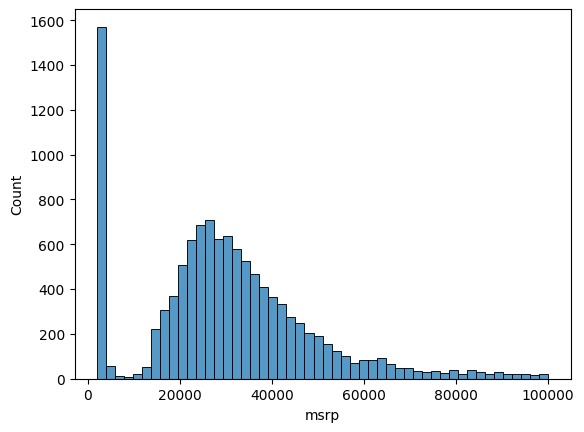

In [10]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Vemos que sigue habiendo una cola larga (the data skews to the right), para hacer el rango de datos mas compacto y simetrico (bell curve), apicamos logaritmo a todos los valores...

In [11]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

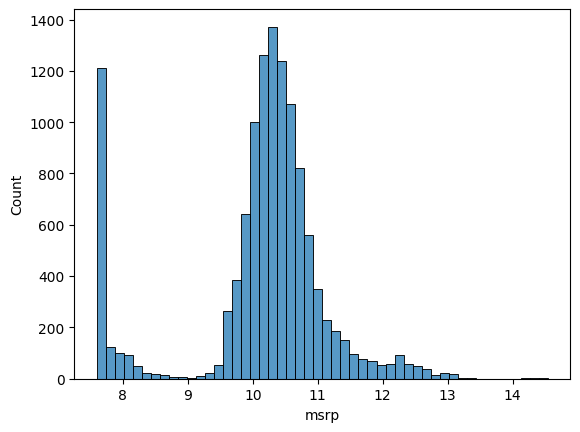

In [12]:
sns.histplot(price_logs, bins=50)

Al graficar los valores con el logaritmo aplicado, vemos que el rango es mas compacto y la grafica es mas simetrica.

Missing values

checamos cuantos null existen por cada columna

In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

Definir las dimensiones de cada dataset

Train = 60%
Validate = 20%
Test = 20%

In [14]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(2382, 2382, 7150)

Para que los sub-datasets no traigan los registros en secuencia desde el dataset original, hay que generar un array de tamanio n, con numeros de 0 a n-1 randomizados

In [16]:
idx = np.arange(n)

In [17]:
np.random.seed(2)
np.random.shuffle(idx)

Traer del dataset original, un conjunto definido por los indexes randomizados (idx[:n_train])

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

Los indexes de los nuevos datasets, seran los indexes traidos del dataset original, eso no nos sirve, vamos a eliminar esos y ponerlos de 0 al numero definido por el tamanio

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Como mencionamos arriba, hay que aplicar el logaritmo al precio para compactar el rango de datos y hacerlos simetricos. Tambien, guardamos el precio en su propio array

In [20]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Eliminamos el precio del dataset de los features

In [21]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [22]:
len(y_train)

7150

# 2.5 Linear regression

Un repaso rapido de como funciona la regresion lineal:

In [23]:
xi = [453, 11, 86]

In [24]:
w0 = 7.17
w = [1, 1, 1]

In [25]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [26]:
linear_regression(xi)

557.1700000000001

In [27]:
w0

7.17

# 2.6 Linear regression vector form

Primero definimos el dot product de los valores a la derecha del w0 en la formula de la linear reg

In [28]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

Despues, en la funcion de linear reg, sumamos w0 al dot product anterior

In [29]:
def linear_regression(xi):
    return w0 + dot(xi, w)

Va otro ejemplo, pero ahora, vamos a incluir el w0 en el dot product. Al final, para incluir el w0 en el dot product, solamente lo agregamos como otro weight y multiplicandolo por 1, para que quede igual. Entonces la formula de lnear reg, en vez de ser w0 mas el dot product, la podemos simplificar, incluyendo el w0 como parte del dot product. Es decir, el w0 es parte del vector w, en vez de estar afuera.

In [30]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

 Creamos un dataset de ejemplo, notar que siempre hay un 1 al inicio, esto es, como dice arriba, para multiplicarlo por el w0 y quede igual.

 Despues, creamos la lista X y la convertimos en un array de listas.

In [31]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Entonces, podemos llevar a cabo el calculo de la linear reg, solamente con la funcion dot(), ya que el w0 es parte del vector w y el 1, parte del vector x.

In [32]:
def linear_regression(X):
    return X.dot(w_new)

In [33]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# 2.7 Training a linear regression model

In [34]:
def train_linear_regression(X, y):
    pass

Definimos un dataset para trabajar, ojo, no tiene 1's al inicio

In [35]:
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],
    [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86],
    [38,   54, 185],
    [142,   25, 431],
    [453,   31,   86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

Creamos un vector con 1's de tamaño X.shape(0), el numero de rows de X

In [36]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Agregamos el vector que recien creamos a X, con column_stack

In [37]:
X = np.column_stack([ones, X])

In [38]:
X = [
    [148,   24, 1385],
    [132,   25, 2031],
    [453,   11,   86],
    [158,   24, 185],
    [172,   25, 201],
    [413,   11,   86],
    [38,   54, 185],
    [142,   25, 431],
    [453,   31,   86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

Creamos un dataset con los precios

In [39]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

Para obtener w (los weights), tenemos la formula que debemos hacer en los siguientes pasos:

1. Hacer Transpose de X --> X.T
2. El Transpose, multiplicarlo por X --> X.T.dot(X)

In [40]:
XTX = X.T.dot(X)
XTX

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

3. Sacar la Inversa --> np.linalg.inv(XTX)

In [41]:
XTX_inv = np.linalg.inv(XTX)

4. Por ultimo, la inversa multiplicarla por Transpose de X por Y

In [42]:
w_full = XTX_inv.dot(X.T).dot(y)

Separar w0 de los demas. w0 es un numero, lo demas es un vector con los weights

In [43]:
w0 = w_full[0]
w = w_full[1:]

In [44]:
w0, w

(np.float64(26.08419497680291), array([286.12285934,   3.93813107]))

In [45]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [46]:
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

# 2.8 Car price baseline model

In [47]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

Vamos a entrenar el modelo solo con las columnas que tienen numeros... creamos base[] con esas columnas

In [48]:
base = ['engine_hp','engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

Asignamos a X_train los valores de esas columnas

In [49]:
X_train = df_train[base].values

Escribimos ceros en donde hay Nan's

In [50]:
X_train = df_train[base].fillna(0).values

Ahora si, entrenamos el modelo con el dataset X_train y sus targets y_train. Guardamos w0 y w con todos los weights

In [51]:
w0, w = train_linear_regression(X_train, y_train)

Vamos a correr el modelo utilizando el mismo dataset X_train y guardamos las predicciones en y_pred

In [52]:
y_pred = w0 + X_train.dot(w)

In [53]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

Graficamos las predicciones y los targets para ver que tan diferente son las predicciones del modelo.

Podemos ver que las predicciones siempre seon mas bajas que los targets. Ahora, necesitamos tener una forma estricta para decir si el modelo es bueno o mal, no basta con ver las grafica. Para eso utilizaremos RMSE 'root mean squared error'

<Axes: ylabel='Count'>

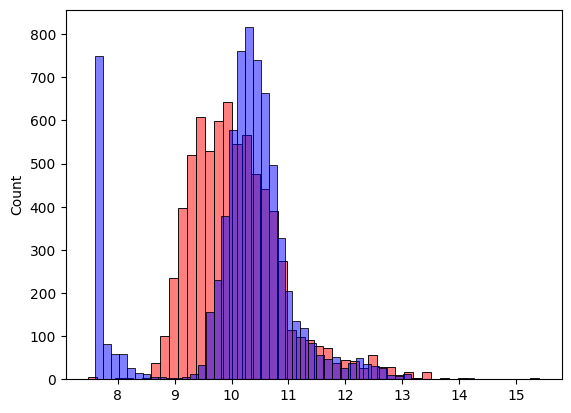

In [54]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# 2.9 RMSE (Root Mean Square Error)

El RMSE es una medida que nos permite entender el desempeño del modelo. Es un promedio del error de todas las observaciones.

In [55]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

# 2.10 Validating the model

Preparamos el training dataset, es decir, seleccionamos las columnas que necesitamos (las definimos arriba en base[]), y reemplazamos Nan con 0's

In [57]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

Entrenamos el modelo y lo corremos con el dataset de validacion (X_val). Obtenemos un RMSE de 0.7616

In [58]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

# 2.11 Simple feature engineering

Vamos a agregar una variable al dataset original, esta es el año del auto

In [59]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

Preparamos el dataset para volver a entrenar el modelo, esta vez con la variable nueva "age", o sea, la edad del auto.
Creamos una copia del dataset para no modificar el original.
Creamos la columna 'age', que es el año en que se creo el dataset (df_train.year.max())
La agregamos a las columnas que seleccionamos anteriormente (features = base + ['age'])
Ponemos 0's en los Nans

In [60]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

Volvemos a entrenar al modelo, ahora con la nueva variable 'age'.
Preparamos el dataset de validacion.
Corremos el modelo con el dataset de validacion.
Obtenemos un RMSE de 0.5172, mejor que el anterior (0.7616), lo cual hace s

In [61]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058299)

# 2.12 Categorical variables

In [62]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.515799564150169)

In [64]:
makes = list(df.make.value_counts().head().index)

In [65]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556795)

In [67]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [68]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [69]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df_train[c].value_counts().head().index)

In [70]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [71]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categories.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(18.233065519897817)

In [73]:
w0

np.float64(1490771050477478.8)

# 2.13 Regularization

In [74]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [75]:
y = [1, 2, 3, 1, 2, 3]

In [76]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [77]:
XTX_inv = np.linalg.inv(XTX)

In [78]:
XTX_inv.dot(X.T).dot(y)

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

In [79]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [80]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [81]:
XTX = XTX + 0.01 * np.eye(3)

In [82]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [83]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [84]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.456521990159498)